# Getting access to Mat's Data

In [15]:
#This gets us into the right directory from home, in order to run the import python script from Mat

#sys = system (module), gives information and control over python interpreter/terminal itself
import sys
sys.path.append("/home/565/pv3484/aus_substation_electricity")

#% is a magic command, special shortcut command that lets you control/interact with notebook environment (ie. gives control of terminal without writing full python code)
%cd /home/565/pv3484/aus_substation_electricity

!pwd

/home/565/pv3484/aus_substation_electricity
/home/565/pv3484/aus_substation_electricity


In [17]:
#This section imports the substations that Mat put together

%run /home/565/pv3484/aus_substation_electricity/import_substation.py

processing nsw substations for ['ausgrid'] from None to None
ausgrid
following columns in demand are not in info index:
['MT_HU', 'SI_NO']
removing these columns from demand
number of substations in ausgrid substation info: 134
number of substations in ausgrid substation data: 132
following sites match selection criteria:
               energy_asset          Name  Area  Dwellings  Persons  Residential  Commercial  Industrial  Primary Production  Education  \
ID                                                                                                                                        
BLAKE         AG_BLAKEHURST    Blakehurst     7      10081    28521        0.850       0.005       0.021               0.000      0.022   
PUNCH          AG_PUNCHBOWL     Punchbowl     9      17514    50395        0.826       0.048       0.038               0.000      0.025   
MEADO         AG_MEADOWBANK    Meadowbank    15      22420    56948        0.825       0.023       0.015               0

# Residential Fractions (RF)

In [9]:
#print names in each column of the info variable

print("Column names in info:",info.columns)

#residential column 6

Column names in info: Index(['energy_asset', 'Name', 'Area', 'Dwellings', 'Persons', 'Residential', 'Commercial', 'Industrial', 'Primary Production', 'Education',
       'Hospital/Medical', 'Transport', 'Parkland', 'Water', 'Other'],
      dtype='object')


## Basic example commands to print substations within RF range

In [22]:
columns_to_print = ['Name', 'Residential']

residential_over_50 = info[info['Residential'] > 0.5][columns_to_print]

print(residential_over_50)

                  Name  Residential
BLAKE       Blakehurst        0.850
PUNCH        Punchbowl        0.826
MEADO       Meadowbank        0.825
MOSMA           Mosman        0.817
RIVER        Riverwood        0.813
CA_CO      Castle Cove        0.807
DU_HI     Dulwich Hill        0.799
FI_DO        Five Dock        0.798
UMINA            Umina        0.790
CAMPS          Campsie        0.789
HU_HI     Hunters Hill        0.782
MORTD         Mortdale        0.778
CHATS        Chatswood        0.766
KOGAR          Kogarah        0.760
PE_HI    Pennant Hills        0.746
LIDCO         Lidcombe        0.743
BURWO          Burwood        0.737
HORNS          Hornsby        0.731
EPPIN           Epping        0.728
DE_WH     Dee Why West        0.722
HARBO          Harbord        0.714
SEFTO           Sefton        0.706
MARRI     Marrickville        0.696
GR_PA   Greenacre Park        0.689
ENFIE          Enfield        0.681
ARNCL        Arncliffe        0.672
REVES          Revesby      

In [26]:
columns_to_print = ['Name', 'Residential']

rf_40_60 = info[(info['Residential'] >= 0.4) & (info['Residential'] <= 0.6)][columns_to_print]

print(rf_40_60)

                  Name  Residential
NE_CB    Newcastle Cbd        0.587
MAROU         Maroubra        0.582
BA_NO  Balgowlah North        0.577
ADAMS        Adamstown        0.571
JESMO          Jesmond        0.563
KIRRA         Kirrawee        0.563
BE_HI      Beacon Hill        0.562
WO_WO          Woy Woy        0.551
CHARM       Charmhaven        0.550
CHARL      Charlestown        0.547
ST_PE       St. Peters        0.544
BROOK        Brookvale        0.538
NORAV        Noraville        0.534
CRONU         Cronulla        0.534
BROAD      Broadmeadow        0.527
ROCKD         Rockdale        0.526
GO_HI        Gore Hill        0.521
ERINA            Erina        0.508
LEIGH    Leightonfield        0.489
PO_HI       Potts Hill        0.488
GATES        Gateshead        0.479
PYMBL           Pymble        0.478
MASCO           Mascot        0.473
MILPE         Milperra        0.461
MATRA       Matraville        0.420
MA_WE    Mayfield West        0.412
BOTAN           Botany      

In [27]:
columns_to_print = ['Name', 'Residential']

rf_60_80 = info[(info['Residential'] >= 0.6) & (info['Residential'] <= 0.8)][columns_to_print]

print(rf_60_80)

                 Name  Residential
DU_HI    Dulwich Hill        0.799
FI_DO       Five Dock        0.798
UMINA           Umina        0.790
CAMPS         Campsie        0.789
HU_HI    Hunters Hill        0.782
MORTD        Mortdale        0.778
CHATS       Chatswood        0.766
KOGAR         Kogarah        0.760
PE_HI   Pennant Hills        0.746
LIDCO        Lidcombe        0.743
BURWO         Burwood        0.737
HORNS         Hornsby        0.731
EPPIN          Epping        0.728
DE_WH    Dee Why West        0.722
HARBO         Harbord        0.714
SEFTO          Sefton        0.706
MARRI    Marrickville        0.696
GR_PA  Greenacre Park        0.689
ENFIE         Enfield        0.681
ARNCL       Arncliffe        0.672
REVES         Revesby        0.657
CARDI         Cardiff        0.650
TO_RY        Top Ryde        0.642
NARRA       Narrabeen        0.640
BANKS       Bankstown        0.637
CONCO         Concord        0.631
CARIN       Caringbah        0.627
BA_HI       Bass Hil

# Plotting substation demand within specific RF range

## Using the function above
- Easily change the residential fraction

In [58]:
import os
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

def plot_christmas_day(demand, info, rf_min=0.0, rf_max=0.2,
                       years=range(2010, 2017),
                       output_folder="./figures/Residential_fractions"):
    """
    Plot Christmas Day demand for substations within a given Residential fraction range.

    Parameters
    ----------
    demand : pd.DataFrame
        Time-indexed demand data (datetime index, substations as columns).
    info : pd.DataFrame
        Metadata table with substation info (must include 'Name' and 'Residential').
    rf_min : float
        Minimum residential fraction (inclusive).
    rf_max : float
        Maximum residential fraction (inclusive).
    years : iterable
        Years to include in the plots.
    output_folder : str
        Folder where PNG plots will be saved.
    """

    # --- Ensure datetime index ---
    demand.index = pd.to_datetime(demand.index)

    # --- Filter for Christmas Day across all years ---
    christmas_data = demand[(demand.index.month == 12) & (demand.index.day == 25)]

    # --- Restrict to substations within RF range ---
    rf_subset = info.index[(info['Residential'] >= rf_min) & (info['Residential'] <= rf_max)].tolist()
    substations = [s for s in demand.columns if s in rf_subset]

    # --- Prepare colormap ---
    cmap = matplotlib.colormaps.get_cmap('plasma')
    norm = mcolors.Normalize(vmin=min(years), vmax=max(years))

    # --- Ensure output folder exists ---
    os.makedirs(output_folder, exist_ok=True)

    # --- Plotting demand ---
    for substation in substations:
        plt.figure(figsize=(10, 4))
        for year in years:
            day_data = christmas_data[christmas_data.index.year == year]
            if day_data.empty:
                continue

            # fractional hours for spacing
            x = day_data.index.hour + day_data.index.minute / 60.0
            y = day_data[substation].values

            color = cmap(norm(year))
            plt.plot(x, y, color=color, label=str(year))

        # Metadata
        full_name = info.loc[substation, 'Name']
        fraction = info.loc[substation, 'Residential']

        plt.title(f'Demand on Christmas Day for {full_name} (Res {fraction:.2f})')
        plt.xlabel('Time of Day (hour)')
        plt.ylabel('Electricity Demand')
        plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
        plt.xlim(0, 24)
        xticks = np.arange(0, 25, 1)
        plt.xticks(xticks, [f'{int(t):02d}:00' for t in xticks], rotation=45)
        plt.tight_layout()

        # --- Save figure with actual fraction in filename ---
        filename = f"{full_name}_XMASDAY_RF.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath, dpi=300)
        plt.close()

# Using plt.close() stops juypterlab from processing the plot here, that way I can export and save it into a folder and push onto git

### Using this will change the plot (above) output and saving it into pwd

In [60]:
#default 0 - 20%
#plot_christmas_day(demand, info)

#40 - 60%
#plot_christmas_day(demand, info, rf_min=0.4, rf_max=0.6)

#all substations
#plot_christmas_day(demand, info, rf_min=0.0, rf_max=1.0)

### Plotting with the full substation name

In [44]:
for substation in substations:
    plt.figure(figsize=(10, 4))
    for year in years:
        day_data = christmas_data[christmas_data.index.year == year]
        if day_data.empty:
            continue

        x = (day_data.index.hour 
             + day_data.index.minute / 60.0 
             + day_data.index.second / 3600.0)
        y = day_data[substation].values

        color = cmap(norm(year))
        plt.plot(x, y, color=color, label=str(year))

    # Use full name from info
    full_name = info.loc[substation, 'Name']
    fraction = info.loc[substation, 'Residential']
    plt.title(f'Demand on Christmas Day for {full_name} (Res {fraction:.2f})')

    plt.xlabel('Time of Day (hour)')
    plt.ylabel('Electricity Demand')
    plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
    plt.xlim(0, 24)
    xticks = np.arange(0, 25, 1)
    plt.xticks(xticks, [f'{int(t):02d}:00' for t in xticks], rotation=45)
    plt.tight_layout()
    plt.close()

## Plotting Blake and Lisar on the same plot

In [61]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import numpy as np

substations_to_plot = ["BLAKE", "LISAR"]
years = list(range(2010, 2017))

cmap = matplotlib.colormaps.get_cmap("plasma")
norm = mcolors.Normalize(vmin=min(years), vmax=max(years))

plt.figure(figsize=(12, 5))

for substation in substations_to_plot:
    linestyle = "-" if substation == "BLAKE" else "--"
    for year in years:
        day_data = christmas_data[christmas_data.index.year == year]
        if day_data.empty:
            continue

        x = (day_data.index.hour
             + day_data.index.minute / 60.0
             + day_data.index.second / 3600.0)
        y = day_data[substation].values

        color = cmap(norm(year))
        plt.plot(x, y, color=color, linestyle=linestyle)

# --- Legend setup ---
# Substation legend (line styles)
blake_line = mlines.Line2D([], [], color="black", linestyle="-", label="BLAKE")
lisar_line = mlines.Line2D([], [], color="black", linestyle="--", label="LISAROW")

# Year legend (colors)
year_handles = [mlines.Line2D([], [], color=cmap(norm(y)), linestyle="-", label=str(y)) for y in years]

# Place legends
legend1 = plt.legend(handles=[blake_line, lisar_line], title="Substation", loc="upper left")
plt.gca().add_artist(legend1)  # add first legend manually
plt.legend(handles=year_handles, title="Year", bbox_to_anchor=(1, 0.5), loc="center left")

# Titles and labels
fractions = [info.loc[s, "Residential"] for s in substations_to_plot]
names = [info.loc[s, "Name"] for s in substations_to_plot]

plt.title(
    f"Demand on Christmas Day for {names[0]} [Res {fractions[0]:.2f}] "
    f"and {names[1]} [Res {fractions[1]:.2f}]", fontsize=16
)
plt.xlabel("Time of Day (hour)", fontsize=14)
plt.ylabel("Electricity Demand", fontsize=14)
plt.xlim(0, 24)
plt.ylim()
xticks = np.arange(0, 25, 1)
plt.xticks(xticks, [f"{int(t):02d}:00" for t in xticks], rotation=45)
plt.tight_layout()

# Save before plt.show()
plt.savefig("christmas_demand.png", dpi=300, bbox_inches="tight")
plt.close()

In [37]:
print(info.head())

        energy_asset        Name  Area  Dwellings  Persons  Residential  Commercial  Industrial  Primary Production  Education  Hospital/Medical  \
BLAKE  AG_BLAKEHURST  Blakehurst     7      10081    28521        0.850       0.005       0.021                 0.0      0.022             0.001   
PUNCH   AG_PUNCHBOWL   Punchbowl     9      17514    50395        0.826       0.048       0.038                 0.0      0.025             0.002   
MEADO  AG_MEADOWBANK  Meadowbank    15      22420    56948        0.825       0.023       0.015                 0.0      0.036             0.014   
MOSMA      AG_MOSMAN      Mosman    11      25967    52831        0.817       0.046       0.001                 0.0      0.013             0.001   
RIVER   AG_RIVERWOOD   Riverwood    10      12528    34547        0.813       0.018       0.042                 0.0      0.035             0.002   

       Transport  Parkland  Water  Other  
BLAKE      0.000     0.102    0.0    0.0  
PUNCH      0.001     0.06

# Generalised Function - For any chosen day and chosen RF
- Allows easier plotting of locations within a RF range for specific public holiday dates

## Function for non-moving holidays

In [78]:
import os
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_day(demand, info,
             month, day,
             rf_min=0.0, rf_max=0.2,
             years=None,
             output_folder="./figures/Residential_fractions"):
    """
    Plot demand for a chosen calendar day across all available years,
    restricted to substations within a given Residential fraction range.

    Parameters
    ----------
    demand : pd.DataFrame
        Time-indexed demand data (datetime index, substations as columns).
    info : pd.DataFrame
        Metadata table with substation info (must include 'Name' and 'Residential').
    month : int
        Month of the target day (1–12).
    day : int
        Day of the target day (1–31).
    rf_min : float
        Minimum residential fraction (inclusive).
    rf_max : float
        Maximum residential fraction (inclusive).
    years : iterable or None
        Years to include in the plots. If None, uses all years available in demand.
    output_folder : str
        Folder where PNG plots will be saved.
    """

    # --- Ensure datetime index ---
    demand.index = pd.to_datetime(demand.index)

    # --- Filter for chosen day across all years ---
    day_data_all = demand[(demand.index.month == month) & (demand.index.day == day)]

    # --- Restrict to substations within RF range ---
    rf_subset = info.index[(info['Residential'] >= rf_min) & (info['Residential'] <= rf_max)].tolist()
    substations = [s for s in demand.columns if s in rf_subset]

    # --- Determine years ---
    if years is None:
        years = sorted(day_data_all.index.year.unique())

    # --- Prepare colormap ---
    cmap = matplotlib.colormaps.get_cmap('plasma')
    norm = mcolors.Normalize(vmin=min(years), vmax=max(years))

    # --- Ensure output folder exists ---
    os.makedirs(output_folder, exist_ok=True)

    # --- Plotting demand ---
    for substation in substations:
        plt.figure(figsize=(10, 4))
        for year in years:
            day_data = day_data_all[day_data_all.index.year == year]
            if day_data.empty:
                continue

            # fractional hours for spacing
            x = day_data.index.hour + day_data.index.minute / 60.0
            y = day_data[substation].values

            color = cmap(norm(year))
            plt.plot(x, y, color=color, label=str(year))

        # Metadata
        full_name = info.loc[substation, 'Name']
        fraction = info.loc[substation, 'Residential']

        # Title reflects chosen date
        plt.title(f'Demand on {month:02d}-{day:02d} for {full_name} (Res {fraction:.2f})')
        plt.xlabel('Time of Day (hour)')
        plt.ylabel('Electricity Demand')
        plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
        plt.xlim(0, 24)
        xticks = np.arange(0, 25, 1)
        plt.xticks(xticks, [f'{int(t):02d}:00' for t in xticks], rotation=45)
        plt.tight_layout()

        # --- Save figure with actual fraction in filename ---
        filename = f"{full_name}_{month:02d}-{day:02d}_RF.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath, dpi=300)
        plt.close()

### How to use above
- Examples of dates and RF to change the plots easily

In [77]:
#Australia day for all years with RF 0-0.2
#plot_day(demand, info, month=1, day=26, rf_min=0.0, rf_max=0.2)

#Christmas Day for all years with RF 0.4 - 0.6
#plot_day(demand, info, month=12, day=25, rf_min=0.4, rf_max=0.6)

#Boxing Day
plot_day(demand,info, month=12, day=26, rf_min=0.4, rf_max=0.6)

#Use plot_day when the holiday is fixed

## Function for moving holidays

In [79]:
import os
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_moving_holiday(demand, info,
                        holiday_dates,
                        holiday_name="Holiday",
                        rf_min=0.0, rf_max=0.2,
                        output_folder="./figures/MovingHolidays"):
    """
    Plot demand for a moving holiday (e.g. Good Friday) across all given dates,
    restricted to substations within a given Residential fraction range.

    Parameters
    ----------
    demand : pd.DataFrame
        Time-indexed demand data (datetime index, substations as columns).
    info : pd.DataFrame
        Metadata table with substation info (must include 'Name' and 'Residential').
    holiday_dates : list of datetime.date
        List of holiday dates (one per year).
    holiday_name : str
        Name of the holiday (used in titles and filenames).
    rf_min, rf_max : float
        Residential fraction range for filtering substations.
    output_folder : str
        Folder where PNG plots will be saved.
    """

    demand.index = pd.to_datetime(demand.index)

    # Restrict to substations within RF range
    rf_subset = info.index[(info['Residential'] >= rf_min) & (info['Residential'] <= rf_max)].tolist()
    substations = [s for s in demand.columns if s in rf_subset]

    # Determine years from holiday_dates
    years = sorted({d.year for d in holiday_dates})

    # Prepare colormap
    cmap = matplotlib.colormaps.get_cmap('plasma')
    norm = mcolors.Normalize(vmin=min(years), vmax=max(years))

    os.makedirs(output_folder, exist_ok=True)

    # Plotting demand
    for substation in substations:
        plt.figure(figsize=(10, 4))
        for holiday_date in holiday_dates:
            year = holiday_date.year
            day_data = demand[demand.index.date == holiday_date]
            if day_data.empty:
                continue

            # fractional hours for spacing
            x = day_data.index.hour + day_data.index.minute / 60.0
            y = day_data[substation].values

            color = cmap(norm(year))
            plt.plot(x, y, color=color, label=str(year))

        # Metadata
        full_name = info.loc[substation, 'Name']
        fraction = info.loc[substation, 'Residential']

        plt.title(f'Demand on {holiday_name} for {full_name} (Res {fraction:.2f})')
        plt.xlabel('Time of Day (hour)')
        plt.ylabel('Electricity Demand')
        plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
        plt.xlim(0, 24)
        xticks = np.arange(0, 25, 1)
        plt.xticks(xticks, [f'{int(t):02d}:00' for t in xticks], rotation=45)
        plt.tight_layout()

         # --- Save figure with actual fraction in filename ---
        filename = f"{full_name}_{month:02d}-{day:02d}_RF.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath, dpi=300)
        plt.close()

### How to plot moving public holidays
- Slightly different function required as defining the function requires the holidays library rather than a fixed date

1. Import holidays package

import holidays
import pandas as pd

2. Generate Moving Holiday dates (Example Good Friday for Aus. between 2010 - 2016)

aus_holidays = holidays.Australia(years=range(2010, 2017))

good_fridays = [date for date, name in aus_holidays.items() if name == "Good Friday"]

3. Plotting the Moving Holiday

plot_moving_holiday(demand, info,
                    holiday_dates=good_fridays,
                    holiday_name="GoodFriday",
                    rf_min=0.4, rf_max=0.6)

NameError: name 'month' is not defined

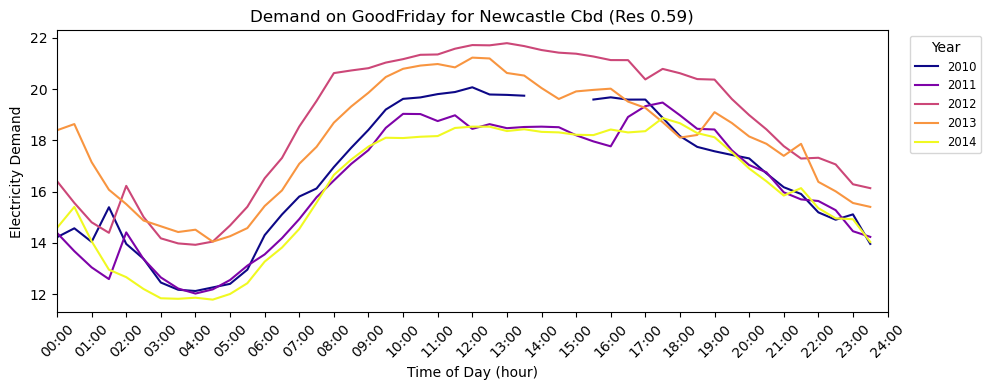

In [81]:
import holidays
import pandas as pd

# 1. Build Australian holiday calendar for 2010–2014
aus_holidays = holidays.Australia(years=range(2010, 2015))

# 2. Extract only Good Friday dates
good_fridays = [date for date, name in aus_holidays.items() if name == "Good Friday"]

# 3. Call your plotting function
plot_moving_holiday(
    demand,
    info,
    holiday_dates=good_fridays,
    holiday_name="GoodFriday",
    rf_min=0.4,
    rf_max=0.6
)